# Users

## Load data

In [1]:
import pickle as pkl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
sns.set()
pd.set_option('display.max_columns', None)

titles = False

In [2]:
data = pkl.load(open('data/data.pkl','rb'))
data.head()

,user_id,exp_id,sch_id_1,sch_id_2,pair,realconf,rec_time,time,userconf,user_sub_val,user_ans_is_match,mouse_loc,order,token_path,term_match,word_net
0,171,14,134,180,"(134, 180)",0,2020-12-19 12:28:39,26,34,67,1,"(1608373691424,1094.4655929721816,406.656,true...",1,0.484821,0.619156,1.0
1,171,14,134,182,"(134, 182)",0,2020-12-19 12:28:45,6,38,69,1,"(1608373716894,897.6866764275256,593.28,true,f...",2,0.454945,0.578095,1.0
2,171,14,153,183,"(153, 183)",1,2020-12-19 12:28:54,9,24,38,0,"(1608373722986,1006.3836017569546,669.312,true...",3,0.552425,0.397624,1.0
3,171,14,149,180,"(149, 180)",0,2020-12-19 12:28:57,3,14,57,1,"(1608373731943,1093.528550512445,667.008,true,...",4,0.502679,0.619156,1.0
4,171,14,163,176,"(163, 176)",1,2020-12-19 12:29:01,4,24,62,1,"(1608373734940,1104.7730600292825,660.096,true...",5,0.570769,0.650000,1.0


### Normalize confidence and filter outliers

In [3]:
data['userconf'] /= 100

In [4]:
time_describe = data[['time']].describe()
lower_bound = max(0, time_describe.loc['mean'].item() - 2 * time_describe.loc['std'].item())
upper_bound = time_describe.loc['mean'].item() + 2 * time_describe.loc['std'].item()
problematic_users = data[(lower_bound > data['time']) | (data['time'] > upper_bound)]['user_id'].unique()
data = data[~data['user_id'].isin(problematic_users)].reset_index(drop=True)
data.head()

,user_id,exp_id,sch_id_1,sch_id_2,pair,realconf,rec_time,time,userconf,user_sub_val,user_ans_is_match,mouse_loc,order,token_path,term_match,word_net
0,174,14,134,180,"(134, 180)",0,2020-12-19 12:37:19,14,0.40,30,0,"(1608374227475,744.9493142516399,642.208883553...",1,0.484821,0.619156,1.0
1,174,14,134,182,"(134, 182)",0,2020-12-19 12:37:28,9,0.24,38,0,"(1608374241158,1025.0685748360168,622.32893157...",2,0.454945,0.578095,1.0
2,174,14,153,183,"(153, 183)",1,2020-12-19 12:37:38,10,0.20,40,0,"(1608374250764,799.1413237924866,670.732292917...",3,0.552425,0.397624,1.0
3,174,14,149,180,"(149, 180)",0,2020-12-19 12:37:46,8,0.14,43,0,"(1608374260455,799.1413237924866,649.123649459...",4,0.502679,0.619156,1.0
4,174,14,163,176,"(163, 176)",1,2020-12-19 12:37:51,5,0.10,55,1,"(1608374268412,883.8640429338104,583.433373349...",5,0.570769,0.650000,1.0


## Users study

### Exp id

14 - prolific
15 - DBMS

exp_id
14    2490
15    1920
dtype: int64

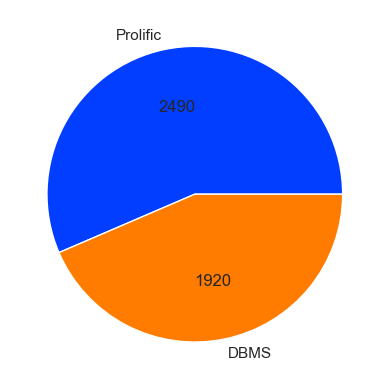

In [5]:
palette_color = sns.color_palette('bright')
counts = data.groupby('exp_id').size()
display(counts)
plt.pie(counts.values, labels=[{14:'Prolific', 15:'DBMS'}[i] for i in counts.index], colors=palette_color, autopct=lambda pct: round(0.01*pct*counts.sum()))
plt.show()

### Times and confidence distributions

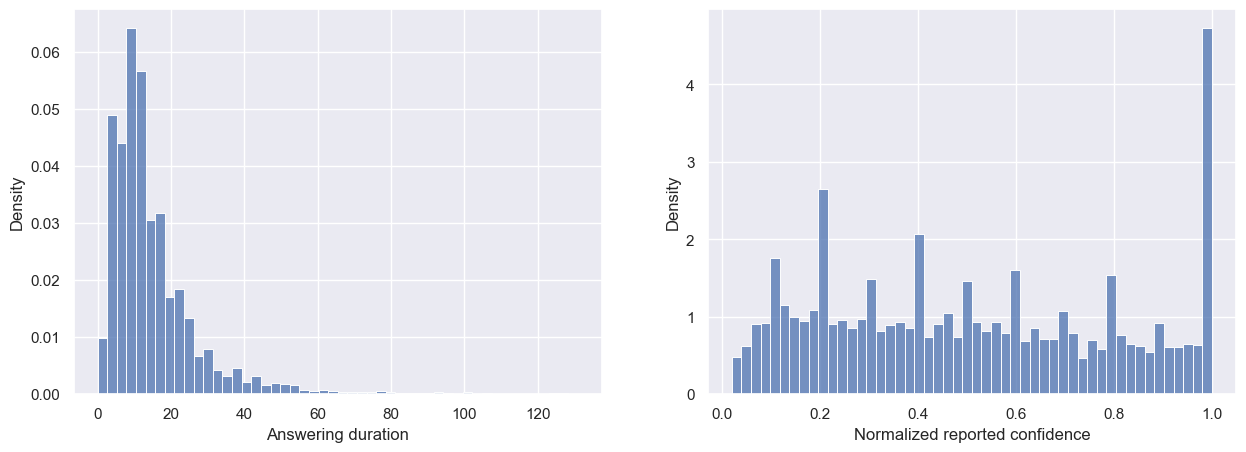

In [6]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
graph = sns.histplot(data, x='time', bins=50, ax=axes[0], stat='density')
graph.set(title="Answering duration histogram" if titles else "", xlabel="Answering duration")
graph = sns.histplot(data, x='userconf', bins=50, ax=axes[1], stat='density')
graph.set(title="Normalized user confidence histogram" if titles else "", xlabel="Normalized reported confidence")
plt.savefig(f"results/users/hists")
plt.show()

mean time in task

In [7]:
data.groupby('user_id')['time'].sum().mean()/60

7.674489795918367

mean time in question

In [8]:
data['time'].mean()

15.348979591836734

match / non-match predicted label distribution

user_ans_is_match
0    1629
1    2781
dtype: int64

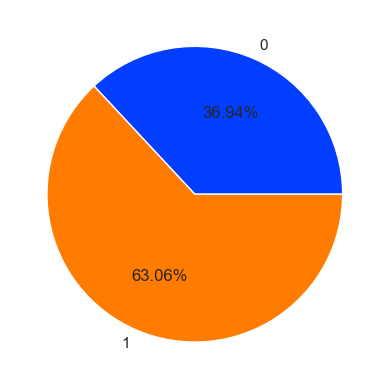

In [9]:
palette_color = sns.color_palette('bright')
counts = data.groupby('user_ans_is_match').size()
display(counts)
plt.pie(counts.values, labels=counts.index, colors=palette_color, autopct='%.2f%%')
plt.show()

Mean normalized confidence

In [10]:
data['userconf'].mean()

0.5089433106575963